In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replace blanks with 0 as tenure is 0 and no total charges are recorded

In [3]:
df ["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df ["TotalCharges"] = df["TotalCharges"].astype ("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df["customerID"].duplicated().sum()

np.int64(0)

# Converted 0 and 1 value of senior citizen to yes/no to make it easier to understand

In [5]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

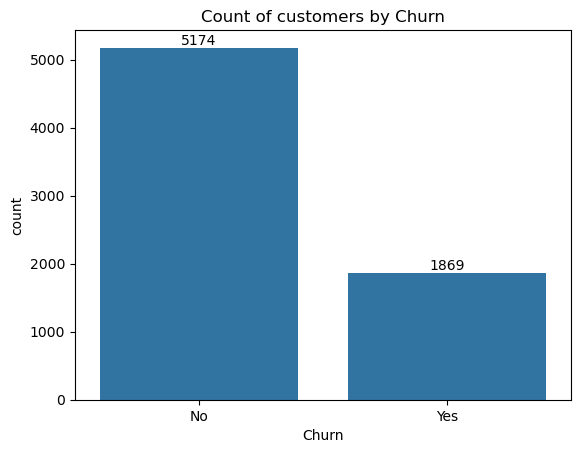

In [16]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

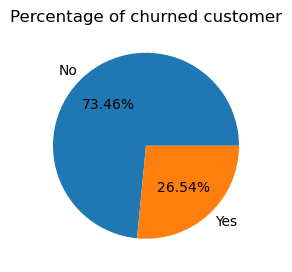

In [19]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of churned customer")
plt.show()

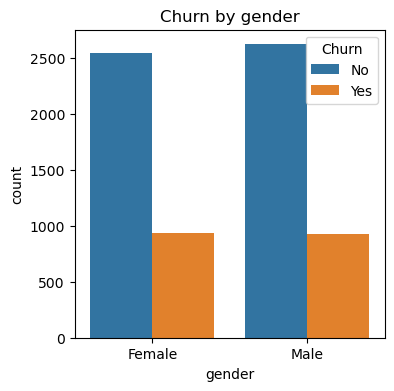

In [24]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.title("Churn by gender")
plt.show()

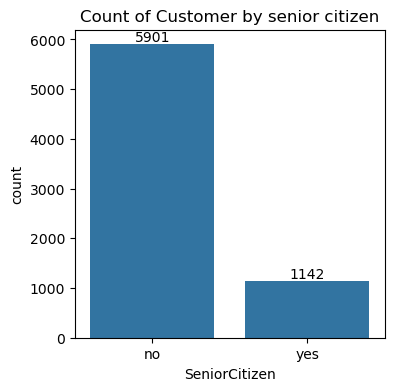

In [30]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by senior citizen")
plt.show()

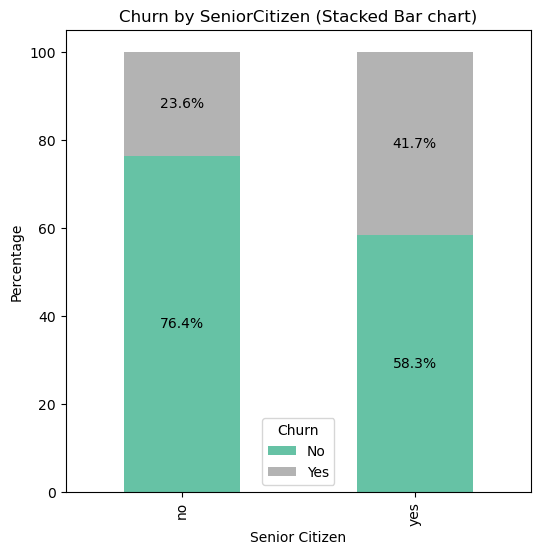

In [28]:


# create crosstab (counts)
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# convert to percentages
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

# plot stacked bar
ax = ct_perc.plot(kind='bar', stacked=True, figsize=(6,6), colormap="Set2")

# add labels on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # avoid labeling empty sections
        ax.text(x + width/2, y + height/2, f"{height:.1f}%", 
                ha='center', va='center', fontsize=10, color='black')

plt.title("Churn by SeniorCitizen (Stacked Bar chart)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn")
plt.show()


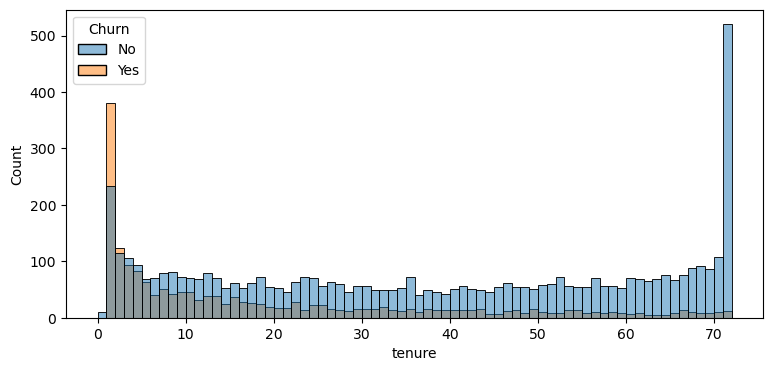

In [34]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = 'Churn')
plt.show()

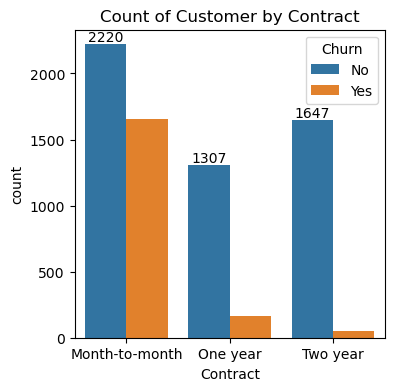

In [4]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

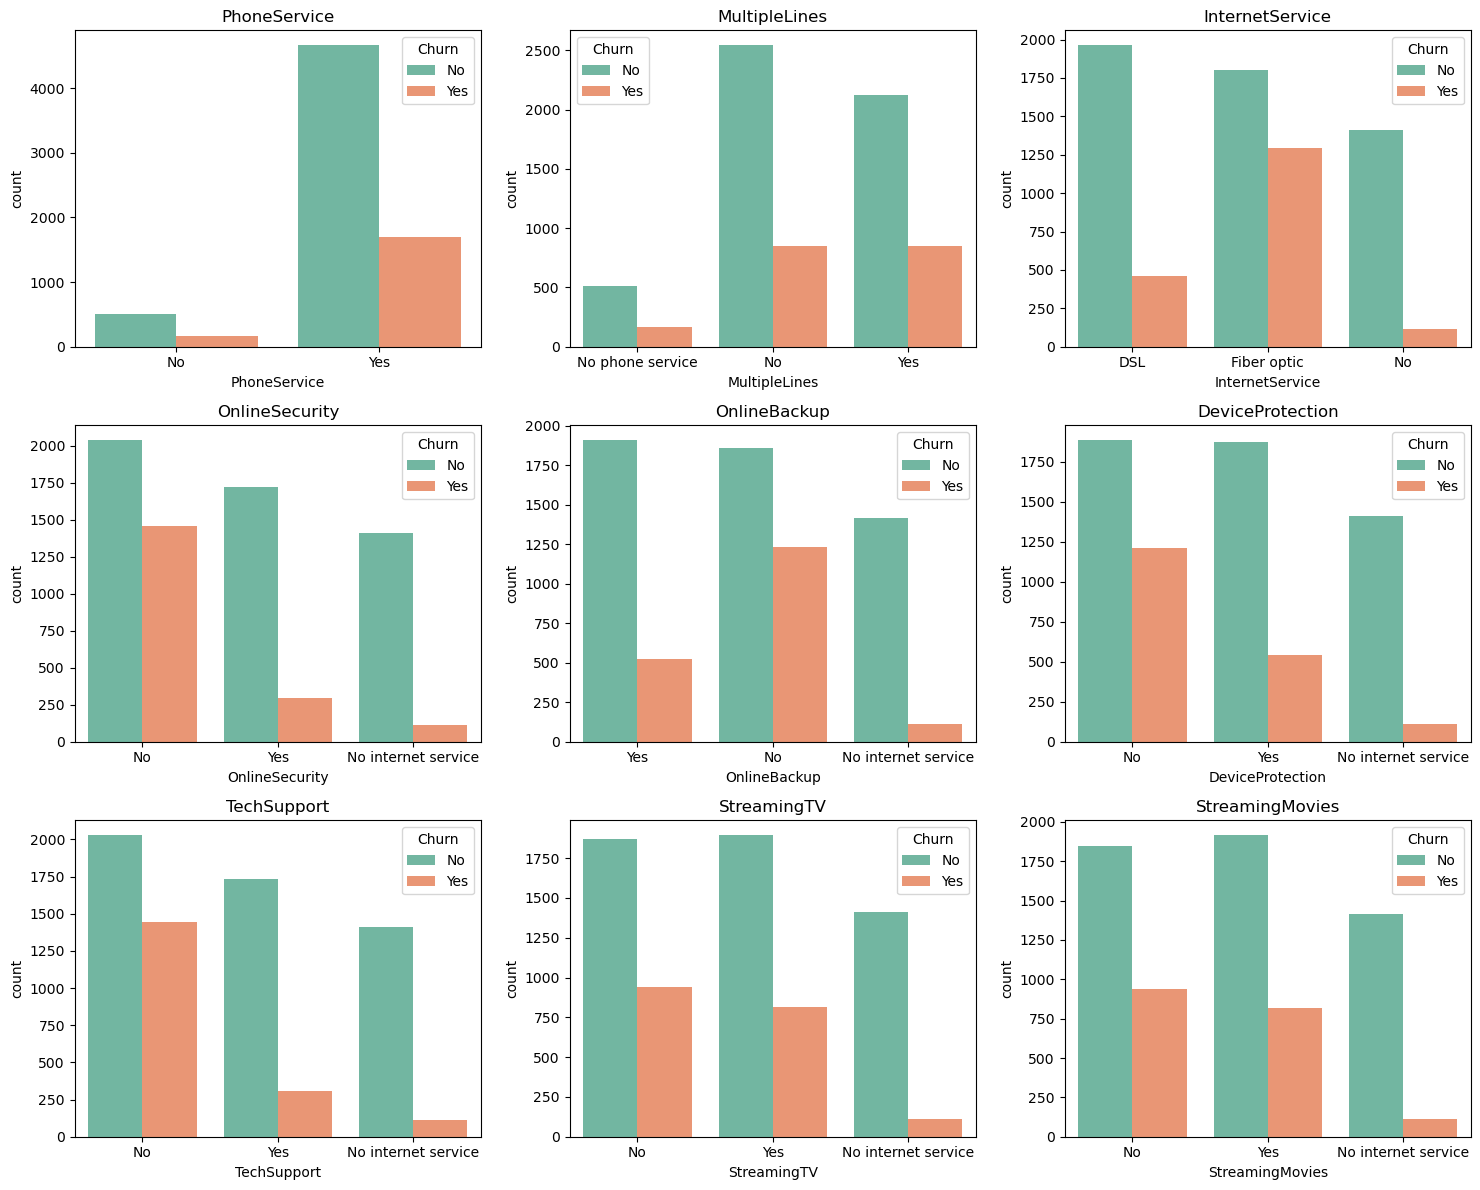

In [10]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# subplot grid size
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # auto rows

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, palette="Set2", hue = 'Churn')
    plt.title(col)

plt.tight_layout()
plt.show()


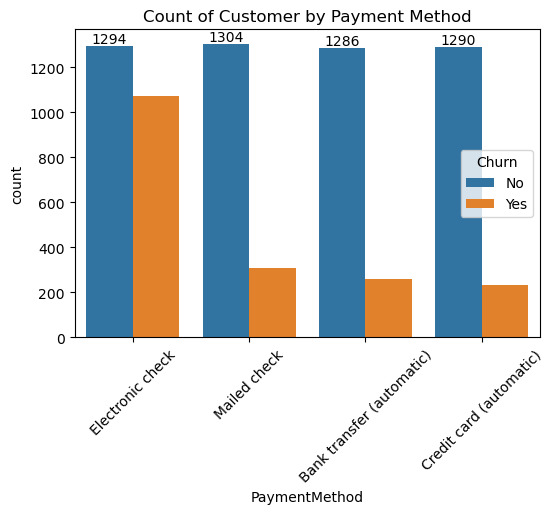

In [15]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Payment Method")
plt.xticks(rotation = 45)
plt.show()